In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import dill
from IPython.core import display as ICD  # to print multiple nice pandas tables
import json
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import tqdm
from tqdm import tqdm_notebook, tnrange
sns.set()
import os

In [12]:
import datasets
import classify
from simple_model import SimpleModel
import glob
from testing import test_simple_model

In [3]:
from multiprocessing import Pool

In [6]:
from collections import defaultdict
results = defaultdict(dict)
dump = defaultdict(dict)

In [14]:
from experimentsbatch import main as m

[autoreload of experimentsbatch failed: Traceback (most recent call last):
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'
]


CRDataset None 0.1 200 CRDataset_None_0.1_200
CRDataset None 0.001 200 CRDataset_None_0.001_200
CRDataset tfidf 0.01 200 CRDataset_tfidf_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

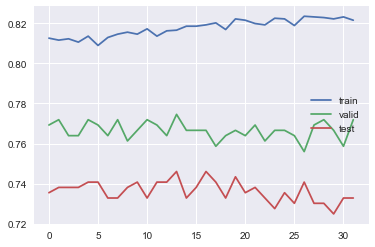

CRDataset
Train precision 0.8219205298013245
Valid precision 0.7652519893899203
Test precision 0.7317460317460316


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



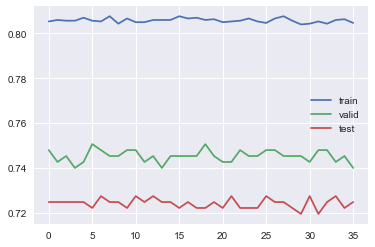

CRDataset
Train precision 0.8054635761589404
Valid precision 0.7450928381962865
Test precision 0.7238095238095238


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



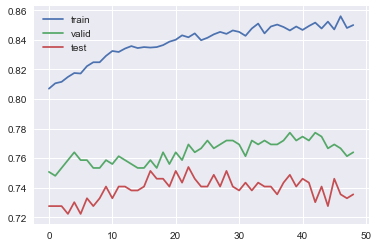

CRDataset
Train precision 0.8497682119205299
Valid precision 0.7697612732095491
Test precision 0.7378306878306878


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



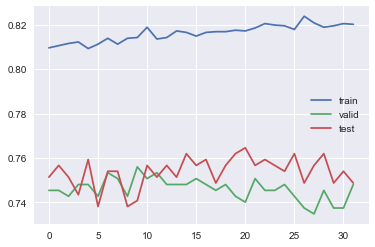


CRDataset
Train precision 0.8201655629139072
Valid precision 0.7421750663129973
Test precision 0.7550264550264549


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

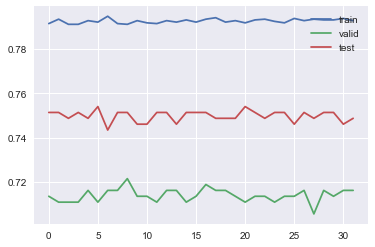


CRDataset
Train precision 0.7929801324503312
Valid precision 0.713527851458886
Test precision 0.7494708994708994


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

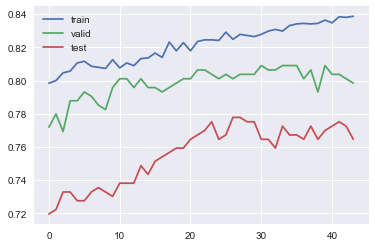


CRDataset
Train precision 0.8356622516556291
Valid precision 0.8034482758620689
Test precision 0.769047619047619


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

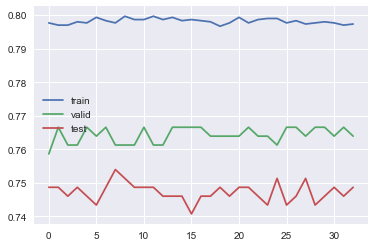

CRDataset
Train precision 0.7979139072847683
Valid precision 0.7649867374005306
Test precision 0.7468253968253968
[('online', 1.0005049723239061), ('formatting', 0.9999965849907715), ('57', 0.9999190768943944), ('hinged', 1.0000026697272932), ('take', 1.0013511375423019), ('drag', 1.000116763588572), ('state', 1.0000855810191889), ('karma', 0.9998939308087886), ('grove', 1.0000488567855172), ('except', 0.9999475239136163)]
CRDataset None 0.001 300 CRDataset_None_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



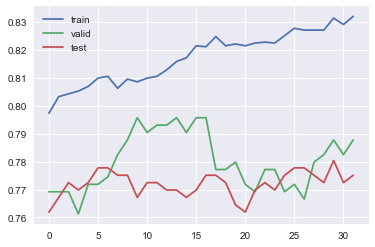

CRDataset
Train precision 0.8272516556291392
Valid precision 0.7782493368700265
Test precision 0.7748677248677248
[('deciding', 1.0005278361197727), ('online', 1.0162078435154027), ('anyways', 1.0000023584099567), ('aux', 0.997466533176602), ('pres', 1.0004824421755232), ('cease', 1.0002452279246032), ('hinged', 0.9957872374558997), ('take', 1.127676902061166), ('drag', 0.9995904209159643), ('state', 1.0008555413687552)]
CRDataset None 0.1 300 CRDataset_None_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



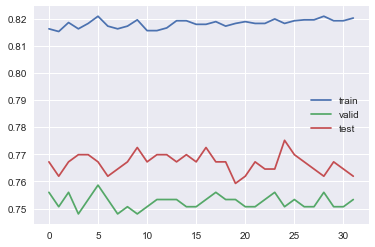


CRDataset
Train precision 0.8194039735099338
Valid precision 0.7525198938992042
Test precision 0.7661375661375661


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

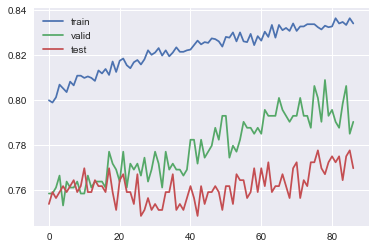

CRDataset
Train precision 0.833907284768212
Valid precision 0.7946949602122017
Test precision 0.771957671957672
[('deciding', 0.9996519159393535), ('online', 1.0234614986848283), ('e-mailed', 1.000083209316303), ('57', 0.9782939330257222), ('pres', 1.0001679949993065), ('digic', 1.010224969016236), ('take', 0.9838423746392321), ('drag', 1.004274000758649), ('state', 0.9939543081144515), ('karma', 1.0100075711991547)]
CRDataset tfidf 0.01 300 CRDataset_tfidf_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



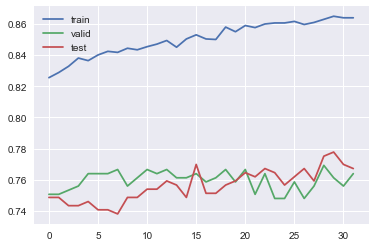


CRDataset
Train precision 0.861887417218543
Valid precision 0.7572944297082227
Test precision 0.7666666666666667


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

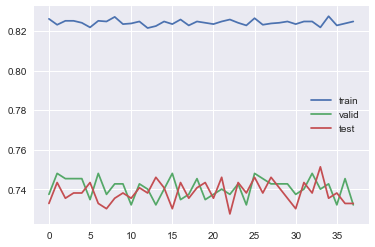

CRDataset
Train precision 0.8243046357615894
Valid precision 0.7403183023872678
Test precision 0.7378306878306878


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



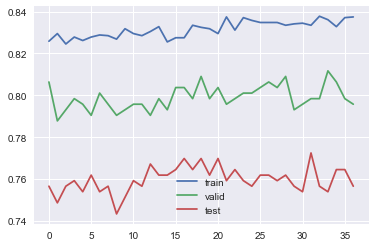


CRDataset
Train precision 0.8351324503311259
Valid precision 0.8010610079575597
Test precision 0.76005291005291


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

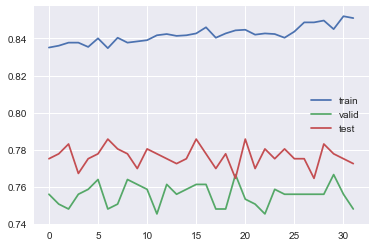

CRDataset
Train precision 0.8464238410596027
Valid precision 0.7554376657824934
Test precision 0.7759259259259259


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



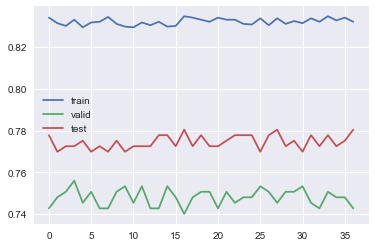


CRDataset
Train precision 0.8328476821192053
Valid precision 0.7477453580901857
Test precision 0.7753968253968255
[('deciding', 1.0000029248960276), ('online', 0.9983385618834628), ('anyways', 1.000000001067204), ('aux', 0.9999349201341486), ('take', 0.999936903551446), ('above-mentioned', 1.0000000064235868), ('state', 0.999932164826393), ('karma', 1.0003268962033678), ('grove', 1.0000741139240845), ('phones', 1.0005796439812562)]
CRDataset None 0.001 400 CRDataset_None_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

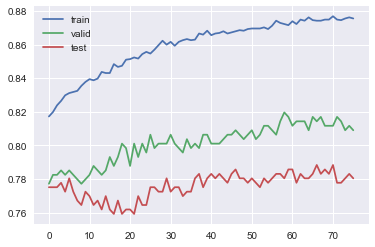

CRDataset
Train precision 0.8751324503311257
Valid precision 0.812732095490716
Test precision 0.7828042328042327


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



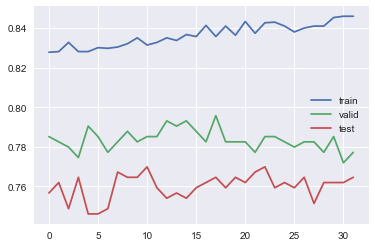


CRDataset
Train precision 0.8424503311258278
Valid precision 0.7809018567639258
Test precision 0.7616402116402117
[('deciding', 0.9996351511862557), ('online', 0.9839074574744673), ('57', 0.9996711036070186), ('pres', 1.0000444655210727), ('pavement', 0.9999678671708269), ('take', 1.0239842467072962), ('drag', 1.000861228192574), ('state', 1.0004311653250764), ('karma', 1.0234878421022957), ('grove', 1.00205636150516)]
CRDataset tfidf 0.01 400 CRDataset_tfidf_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

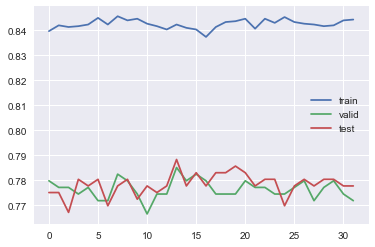

CRDataset
Train precision 0.8433774834437087
Valid precision 0.7758620689655172
Test precision 0.7783068783068783


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



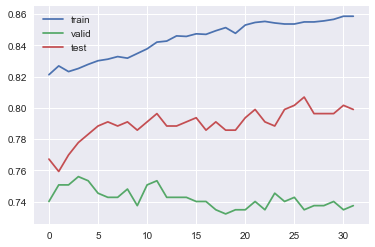


CRDataset
Train precision 0.8556291390728477
Valid precision 0.7384615384615384
Test precision 0.7976190476190477
[('online', 1.105914728066163), ('e-mailed', 1.0011280368924698), ('57', 1.0000006388187728), ('pres', 1.0005987460797099), ('hinged', 0.9998174028633176), ('digic', 1.0199509950523116), ('take', 1.2157697694562952), ('drag', 1.0195387655196189), ('state', 0.9962712160669422), ('karma', 1.0701883515947572)]
CRDataset None 0.1 400 CRDataset_None_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

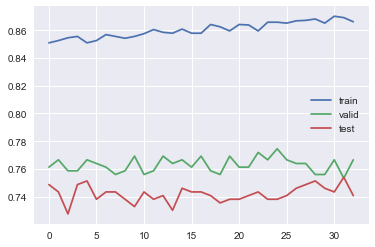

CRDataset
Train precision 0.8670198675496689
Valid precision 0.763395225464191
Test precision 0.7447089947089947


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



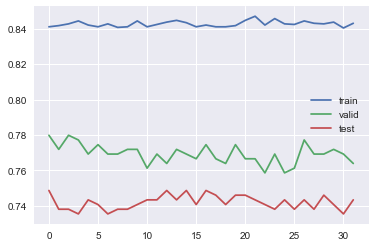


CRDataset
Train precision 0.8430132450331126
Valid precision 0.76684350132626
Test precision 0.7407407407407408


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

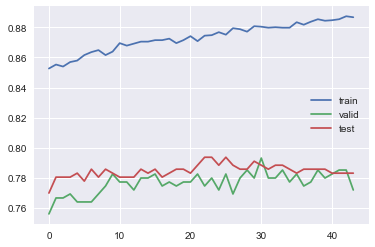

CRDataset
Train precision 0.8843046357615894
Valid precision 0.7801061007957559
Test precision 0.7843915343915344


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



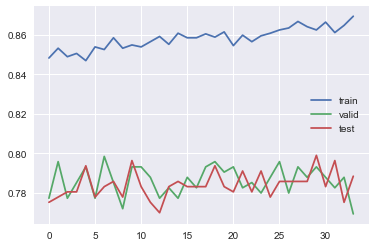


CRDataset
Train precision 0.8643046357615894
Valid precision 0.786472148541114
Test precision 0.7862433862433862


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

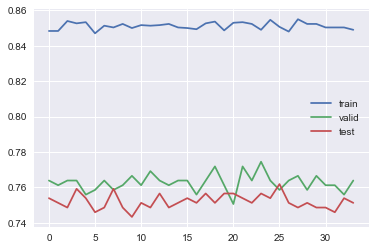

CRDataset
Train precision 0.8512913907284769
Valid precision 0.7620689655172412
Test precision 0.7515873015873016
[('online', 0.9949787431551754), ('anyways', 1.0000000001779668), ('57', 1.0000000025404279), ('pres', 1.0000143612617856), ('take', 1.0014258268642402), ('drag', 0.9999618033957263), ('state', 1.0001104342213318), ('karma', 1.0003403843844916), ('grove', 1.00010140315238), ('except', 1.0002943577633268)]
CRDataset tfidf 0.1 200 CRDataset_tfidf_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-14:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



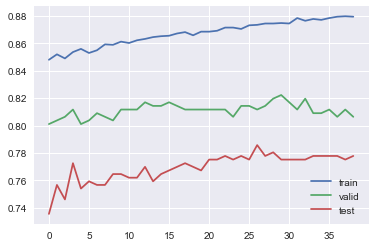


CRDataset
Train precision 0.8776490066225164
Valid precision 0.8124668435013263
Test precision 0.7764550264550265


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

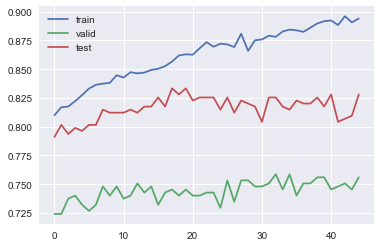


CRDataset
Train precision 0.8895364238410595
Valid precision 0.749867374005305
Test precision 0.8182539682539682


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

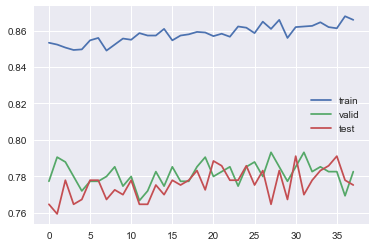

CRDataset
Train precision 0.8630132450331125
Valid precision 0.7824933687002653
Test precision 0.7801587301587302
[('deciding', 1.000062183553319), ('online', 0.9964093392596041), ('57', 1.0013351076758228), ('pres', 1.0000501053480513), ('take', 1.149214384617053), ('above-mentioned', 1.0000000065256818), ('state', 1.0026680665339955), ('karma', 1.023506653166331), ('locked-in', 1.0001073140280328), ('except', 1.0222036566499144)]
CRDataset tfidf 0.001 200 CRDataset_tfidf_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-14:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



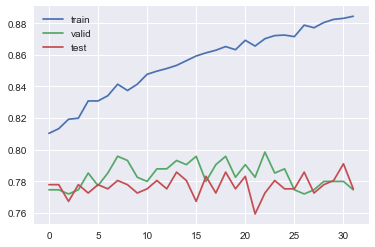

CRDataset
Train precision 0.8772847682119206
Valid precision 0.7806366047745359
Test precision 0.7785714285714287


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-15:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



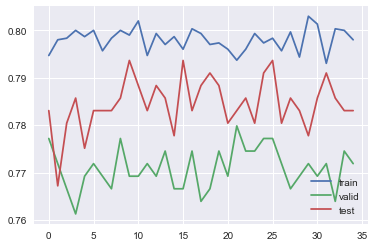


CRDataset
Train precision 0.7983774834437085
Valid precision 0.7708222811671087
Test precision 0.784920634920635


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

In [ ]:
m(offset=0, sharding=10, threads=3)